# Stock Market Prediction using LSTM

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Accessing data

In [2]:
adani=pd.read_csv('https://query1.finance.yahoo.com/v7/finance/download/ADANIPOWER.NS?period1=1646742145&period2=1678278145&interval=1d&events=history&includeAdjustedClose=true')

In [3]:
adani

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-03-08,118.400002,121.449997,117.349998,118.699997,118.699997,27745685
1,2022-03-09,121.300003,122.699997,119.599998,121.300003,121.300003,21234389
2,2022-03-10,125.000000,125.699997,121.349998,122.500000,122.500000,20823339
3,2022-03-11,122.000000,123.500000,121.099998,121.800003,121.800003,14362421
4,2022-03-14,122.550003,123.099998,120.500000,122.150002,122.150002,14143340
...,...,...,...,...,...,...,...
245,2023-03-01,153.000000,153.600006,152.149994,153.600006,153.600006,1372548
246,2023-03-02,161.250000,161.250000,161.250000,161.250000,161.250000,1030431
247,2023-03-03,169.300003,169.300003,169.300003,169.300003,169.300003,648028
248,2023-03-06,177.750000,177.750000,177.750000,177.750000,177.750000,2877047


In [4]:
# Use 'Close'

data=adani['Close']

In [5]:
data

0      118.699997
1      121.300003
2      122.500000
3      121.800003
4      122.150002
          ...    
245    153.600006
246    161.250000
247    169.300003
248    177.750000
249    186.600006
Name: Close, Length: 250, dtype: float64

## Split into train and test

In [6]:
train=data[:200]
test=data[200:]

In [7]:
train

0      118.699997
1      121.300003
2      122.500000
3      121.800003
4      122.150002
          ...    
195    305.750000
196    290.500000
197    276.000000
198    262.200012
199    275.299988
Name: Close, Length: 200, dtype: float64

In [8]:
test

200    289.049988
201    303.500000
202    304.500000
203    299.549988
204    298.149994
205    294.750000
206    286.600006
207    288.750000
208    283.399994
209    287.700012
210    279.200012
211    276.200012
212    273.649994
213    278.700012
214    272.950012
215    281.950012
216    278.700012
217    277.549988
218    275.049988
219    273.200012
220    274.649994
221    261.000000
222    247.949997
223    235.550003
224    223.800003
225    212.649994
226    202.050003
227    191.949997
228    182.350006
229    173.250000
230    181.899994
231    172.800003
232    164.199997
233    156.000000
234    148.199997
235    140.800003
236    147.800003
237    155.149994
238    162.899994
239    171.000000
240    162.449997
241    154.350006
242    146.649994
243    139.350006
244    146.300003
245    153.600006
246    161.250000
247    169.300003
248    177.750000
249    186.600006
Name: Close, dtype: float64

## Visualisation

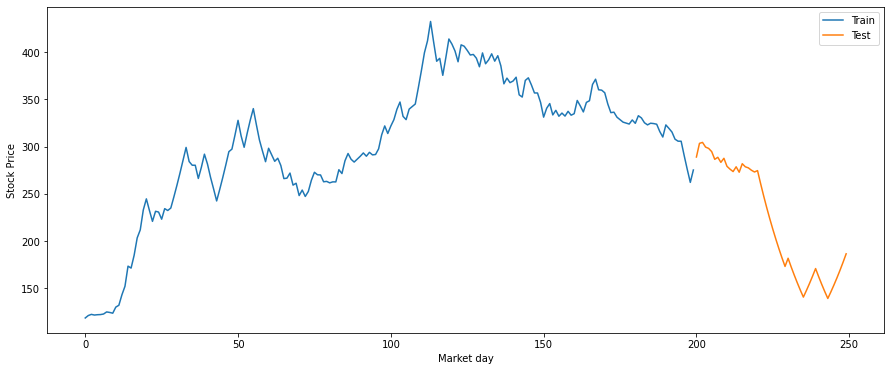

In [9]:
plt.figure(figsize=(15,6))
plt.plot(train)
plt.plot(test)
plt.xlabel('Market day')
plt.ylabel('Stock Price')
plt.legend(['Train','Test']);

## Standardisation 

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

train_scaled=scaler.fit_transform(np.array(train).reshape(-1,1))

test_scaled=scaler.fit_transform(np.array(test).reshape(-1,1))


In [11]:
train_scaled

array([[0.        ],
       [0.00828555],
       [0.01210963],
       [0.00987892],
       [0.01099428],
       [0.01147229],
       [0.01338434],
       [0.02039516],
       [0.01864247],
       [0.01609306],
       [0.03664755],
       [0.04286169],
       [0.07807521],
       [0.10691524],
       [0.17479288],
       [0.16826005],
       [0.21159977],
       [0.27007648],
       [0.2971638 ],
       [0.36456344],
       [0.40168898],
       [0.36281072],
       [0.32584448],
       [0.35978333],
       [0.35723392],
       [0.333174  ],
       [0.36870617],
       [0.36249203],
       [0.37077758],
       [0.40822181],
       [0.44741876],
       [0.48868703],
       [0.53202675],
       [0.57520718],
       [0.52756533],
       [0.51513705],
       [0.51513705],
       [0.47052265],
       [0.50812618],
       [0.55242189],
       [0.51912048],
       [0.47434668],
       [0.43530913],
       [0.39467815],
       [0.43323772],
       [0.47370939],
       [0.51625243],
       [0.560

## Converting TS data to regression data

In [12]:
X_train=[]
y_train=[]
# window_size=10

for i in range(10,200):
  X_train.append(train_scaled[i-10:i,0])
  y_train.append(train_scaled[i])

In [13]:
X_train

[array([0.        , 0.00828555, 0.01210963, 0.00987892, 0.01099428,
        0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306]),
 array([0.00828555, 0.01210963, 0.00987892, 0.01099428, 0.01147229,
        0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755]),
 array([0.01210963, 0.00987892, 0.01099428, 0.01147229, 0.01338434,
        0.02039516, 0.01864247, 0.01609306, 0.03664755, 0.04286169]),
 array([0.00987892, 0.01099428, 0.01147229, 0.01338434, 0.02039516,
        0.01864247, 0.01609306, 0.03664755, 0.04286169, 0.07807521]),
 array([0.01099428, 0.01147229, 0.01338434, 0.02039516, 0.01864247,
        0.01609306, 0.03664755, 0.04286169, 0.07807521, 0.10691524]),
 array([0.01147229, 0.01338434, 0.02039516, 0.01864247, 0.01609306,
        0.03664755, 0.04286169, 0.07807521, 0.10691524, 0.17479288]),
 array([0.01338434, 0.02039516, 0.01864247, 0.01609306, 0.03664755,
        0.04286169, 0.07807521, 0.10691524, 0.17479288, 0.16826005]),
 array([0.02039516, 0.01864247, 0.

In [14]:
y_train

[array([0.03664755]),
 array([0.04286169]),
 array([0.07807521]),
 array([0.10691524]),
 array([0.17479288]),
 array([0.16826005]),
 array([0.21159977]),
 array([0.27007648]),
 array([0.2971638]),
 array([0.36456344]),
 array([0.40168898]),
 array([0.36281072]),
 array([0.32584448]),
 array([0.35978333]),
 array([0.35723392]),
 array([0.333174]),
 array([0.36870617]),
 array([0.36249203]),
 array([0.37077758]),
 array([0.40822181]),
 array([0.44741876]),
 array([0.48868703]),
 array([0.53202675]),
 array([0.57520718]),
 array([0.52756533]),
 array([0.51513705]),
 array([0.51513705]),
 array([0.47052265]),
 array([0.50812618]),
 array([0.55242189]),
 array([0.51912048]),
 array([0.47434668]),
 array([0.43530913]),
 array([0.39467815]),
 array([0.43323772]),
 array([0.47370939]),
 array([0.51625243]),
 array([0.56086684]),
 array([0.56947099]),
 array([0.61679414]),
 array([0.66650735]),
 array([0.61440408]),
 array([0.57568517]),
 array([0.62332693]),
 array([0.66730404]),
 array([0.706

In [15]:
X_train.shape

AttributeError: ignored

In [16]:
# Converting to np.array

X_train=np.array(X_train)
y_train=np.array(y_train)

In [17]:
X_train.shape

(190, 10)

In [18]:
y_train.shape

(190, 1)

In [19]:
# Converting text data

X_test=[]
y_test=[]
# window_size=10

for i in range(10,50):
  X_test.append(test_scaled[i-10:i,0])
  y_test.append(test_scaled[i])

In [20]:
X_test=np.array(X_test)
y_test=np.array(y_test)

In [21]:
X_test.shape

(40, 10)

In [22]:
y_test.shape

(40, 1)

## Model building

In [23]:
lstm=tf.keras.Sequential()
lstm.add(tf.keras.layers.LSTM(50,return_sequences=True,
                              input_shape=(X_train.shape[1],1))) # (10,1)
lstm.add(tf.keras.layers.Dense(1))

In [24]:
# Compiling

lstm.compile(loss=tf.keras.losses.MeanSquaredError(),
             optimizer=tf.keras.optimizers.Adam(),
             metrics=['mae'])

Epoch 1/100
6/6 [==============================] - 3s 8ms/step - loss: 0.3202 - mae: 0.5375
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.1867 - mae: 0.3969
Epoch 3/100
6/6 [==============================] - 0s 7ms/step - loss: 0.1040 - mae: 0.2578
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0884 - mae: 0.2418
Epoch 5/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0810 - mae: 0.2321
Epoch 6/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0675 - mae: 0.1990
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0623 - mae: 0.1827
Epoch 8/100
6/6 [==============================] - 0s 9ms/step - loss: 0.0580 - mae: 0.1739
Epoch 9/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0531 - mae: 0.1663
Epoch 10/100
6/6 [==============================] - 0s 8ms/step - loss: 0.0492 - mae: 0.1614
Epoch 11/100
6/6 [==============================] - 0s 7ms/step - loss: 0.0459 

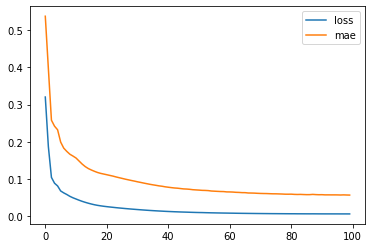

In [25]:
# Training

tf.random.set_seed(10)
hist=lstm.fit(X_train,y_train,epochs=100)
pd.DataFrame(hist.history).plot();

## Evaluation of the model

In [26]:
lstm.evaluate(X_test,y_test)

2/2 [==============================] - 1s 10ms/step - loss: 0.0496 - mae: 0.1691


[0.04961086064577103, 0.16910341382026672]

In [27]:
lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 dense (Dense)               (None, 10, 1)             51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________
